In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import sklearn

In [7]:
import librosa

In [8]:
import librosa.display

In [9]:
import IPython.display as ipd

In [10]:
import os
general_path = 'Data'

In [11]:
from sklearn import preprocessing

In [12]:
from sklearn.decomposition import PCA

In [13]:
import sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
import tensorflow as tf

In [17]:
from tensorflow import keras

In [18]:
from tensorflow.keras import layers

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [22]:
y, sr = librosa.load(f'{general_path}/genres_original/disco/disco.00003.wav')

In [23]:
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [-0.336792   -0.18792725 -0.21746826 ... -0.1513977  -0.13018799
 -0.11328125] 

y shape: (668140,) 

Sample Rate (KHz): 22050 



In [24]:
print('Check Len of Audio:', np.shape(y)[0]/sr)

Check Len of Audio: 30.301133786848073


In [25]:
type(y)

numpy.ndarray

In [26]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [27]:
audio_data = f'{general_path}/genres_original/disco/disco.00047.wav'
import IPython.display as ipd
ipd.Audio(audio_data)

 ...]

<Figure size 864x288 with 0 Axes>

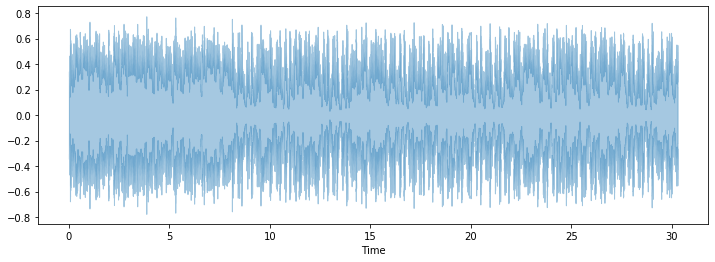

In [28]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)
spectral_centroids.shape
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [29]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

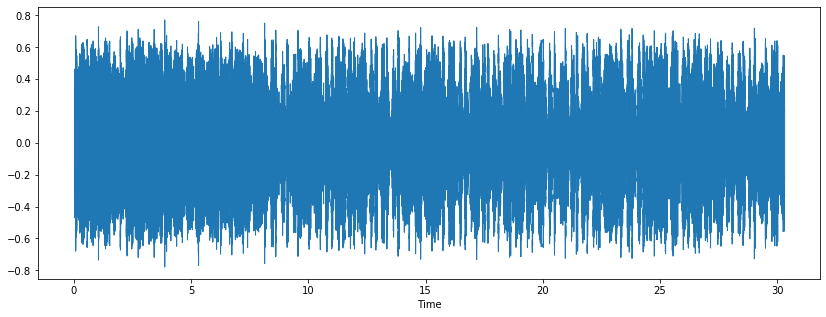

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [31]:
audio_file, _ = librosa.effects.trim(y)

In [32]:
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.336792   -0.18792725 -0.21746826 ... -0.1513977  -0.13018799
 -0.11328125] 

Audio File shape: (668140,)


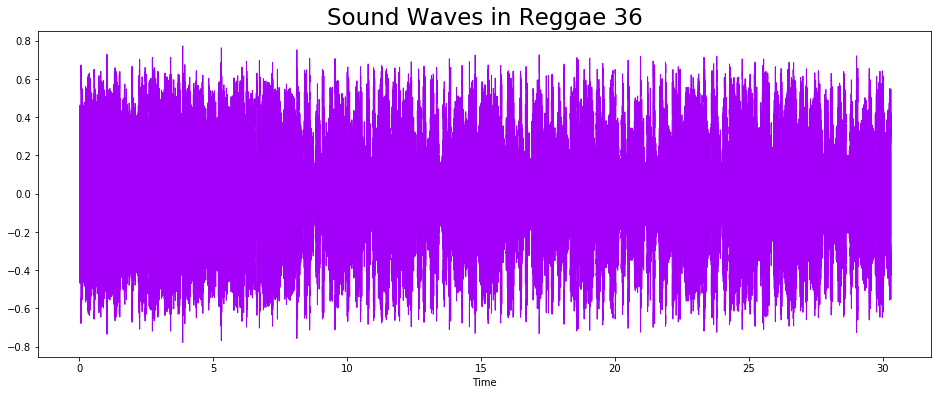

In [33]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

In [34]:
n_fft = 2048 
hop_length = 512 

In [35]:
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

In [36]:
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1305)


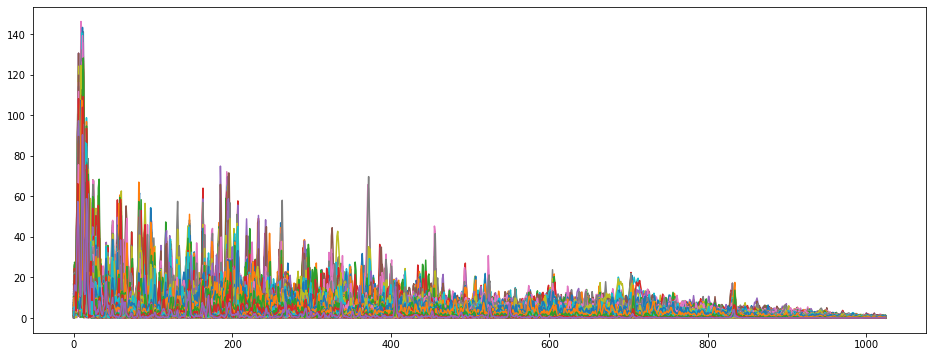

In [37]:
plt.figure(figsize = (16, 6))
plt.plot(D);

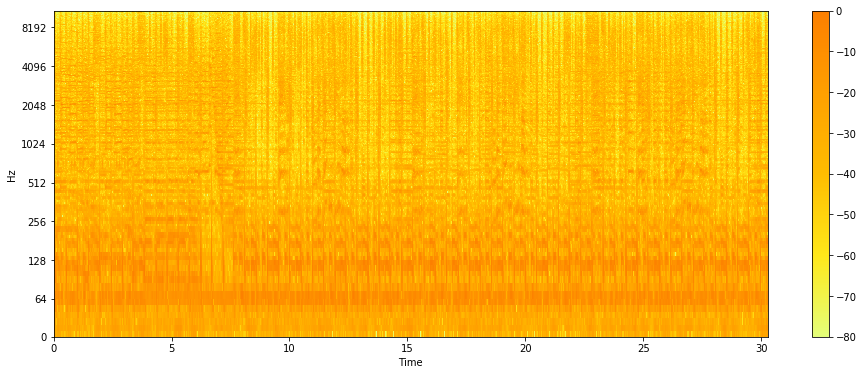

In [38]:
DB = librosa.amplitude_to_db(D, ref = np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'Wistia')
plt.colorbar();

In [39]:
y, sr = librosa.load(f'{general_path}/genres_original/hiphop/hiphop.00012.wav')
y, _ = librosa.effects.trim(y)

In [40]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

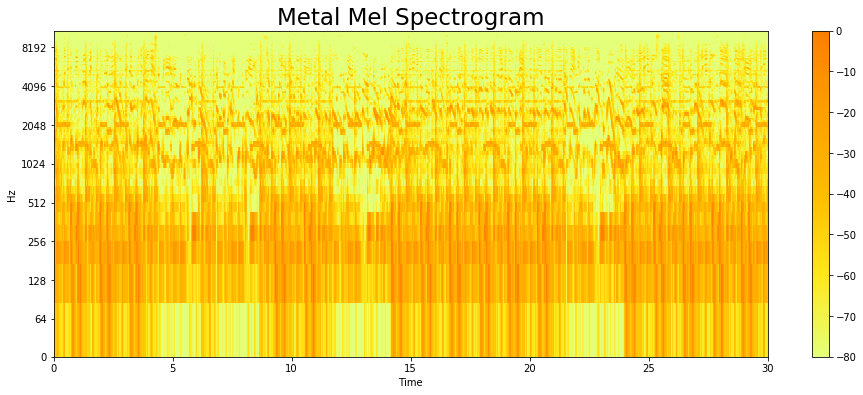

In [41]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'Wistia');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

In [42]:
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00021.wav')
y, _ = librosa.effects.trim(y)

In [43]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

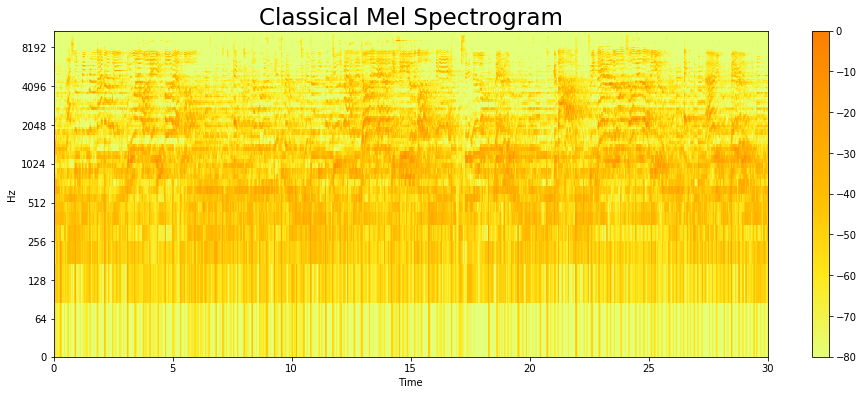

In [44]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'Wistia');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

In [45]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

100022


In [46]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

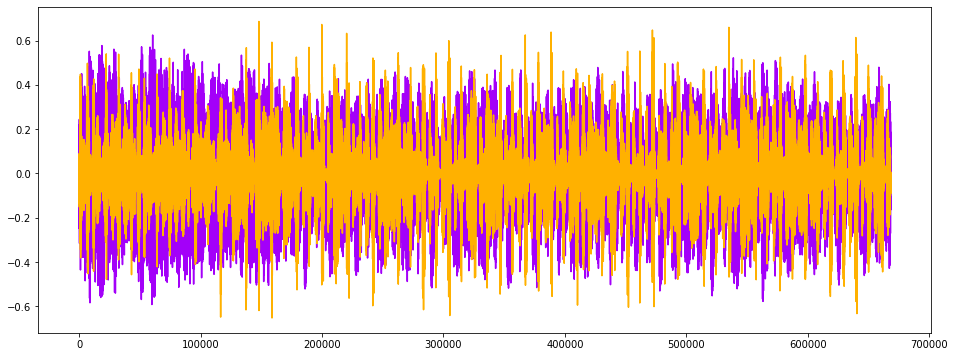

In [47]:
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [48]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

184.5703125

In [49]:
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

In [50]:
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

Centroids: [2904.14764443 2881.0166317  2819.98721991 ... 2887.85999405 2142.16393088
 1832.98549295] 

Shape of Spectral Centroids: (1305,) 



In [51]:
frames = range(len(spectral_centroids))

In [52]:
t = librosa.frames_to_time(frames)

In [53]:
print('frames:', frames, '\n')
print('t:', t)

frames: range(0, 1305) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 3.02323810e+01
 3.02556009e+01 3.02788209e+01]


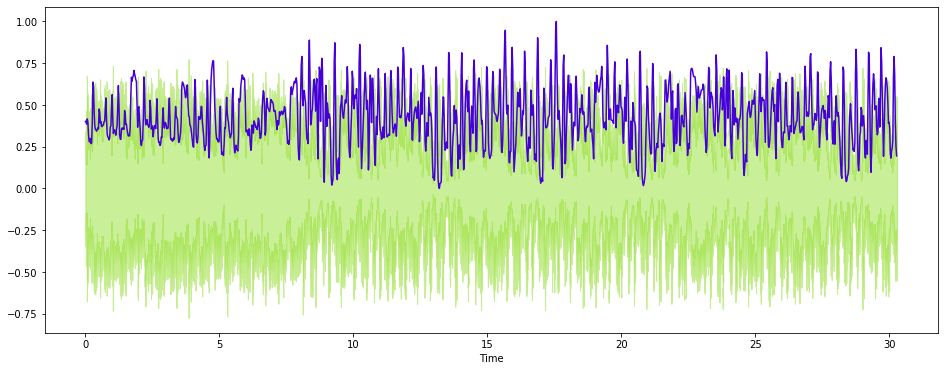

In [54]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#7CD700');
plt.plot(t, normalize(spectral_centroids), color='#4500d9');

In [55]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

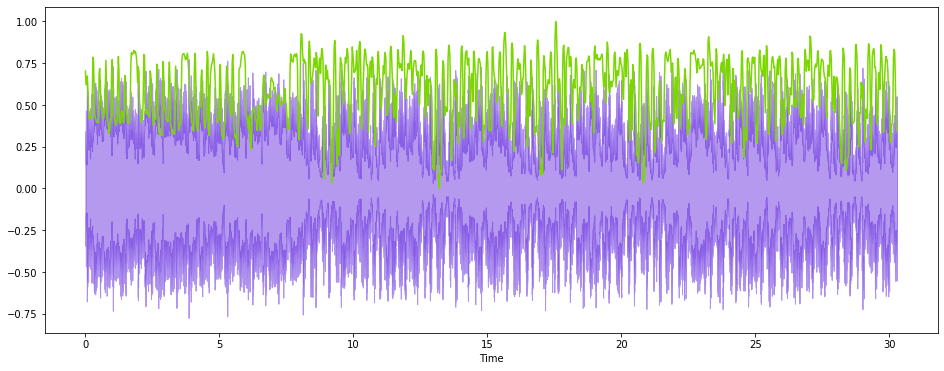

In [56]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#4500d9');
plt.plot(t, normalize(spectral_rolloff), color='#7CD700');

In [57]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

mfccs shape: (20, 1305)


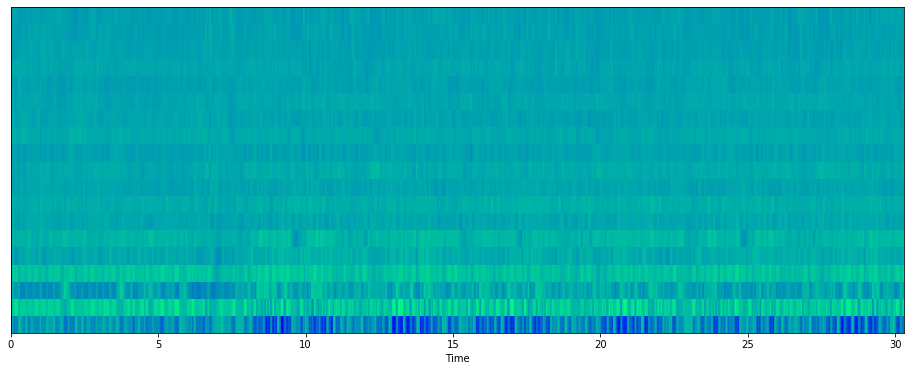

In [58]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'winter');

In [59]:
zfccs = sklearn.preprocessing.scale(mfccs, axis=1)

In [60]:
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

Mean: 6.4262366 

Var: 633.8282


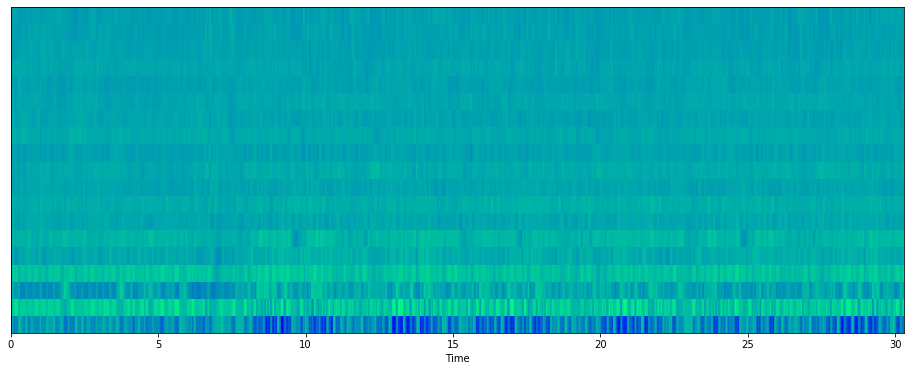

In [61]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'winter');

In [62]:
hop_length = 5000

In [63]:
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

Chromogram shape: (12, 134)


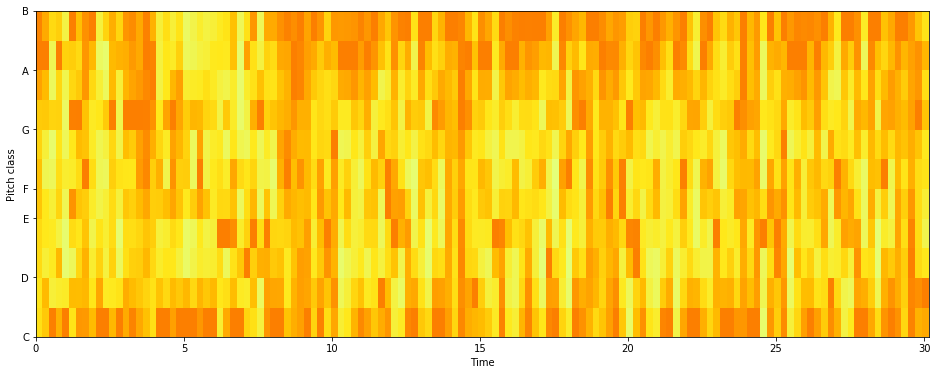

In [64]:
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='Wistia');

In [65]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [66]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

In [67]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

TypeError: 'float' object cannot be interpreted as an integer

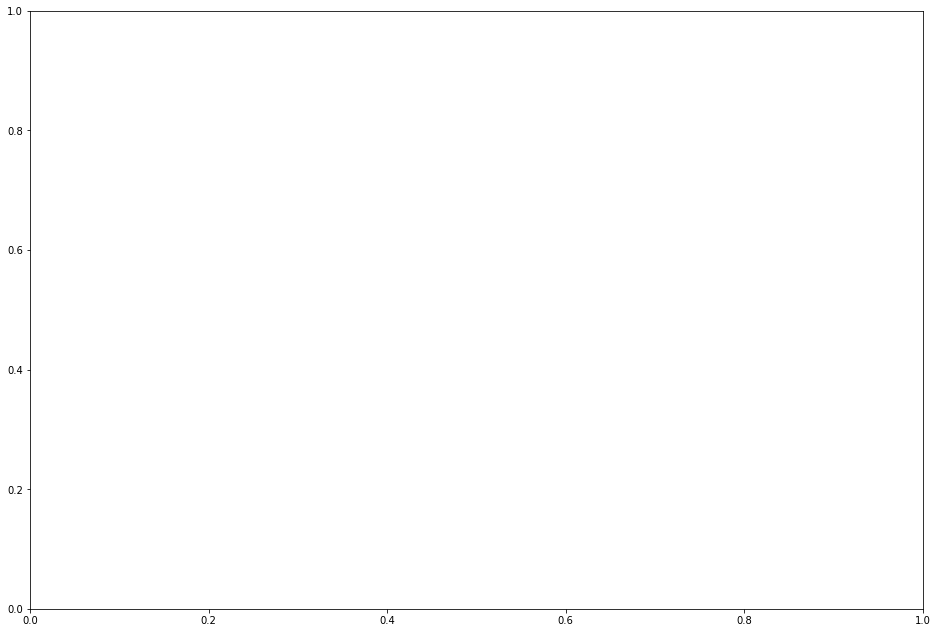

In [68]:
f, ax = plt.subplots(figsize=(16, 11));
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

In [69]:
x = data[["label", "tempo"]]

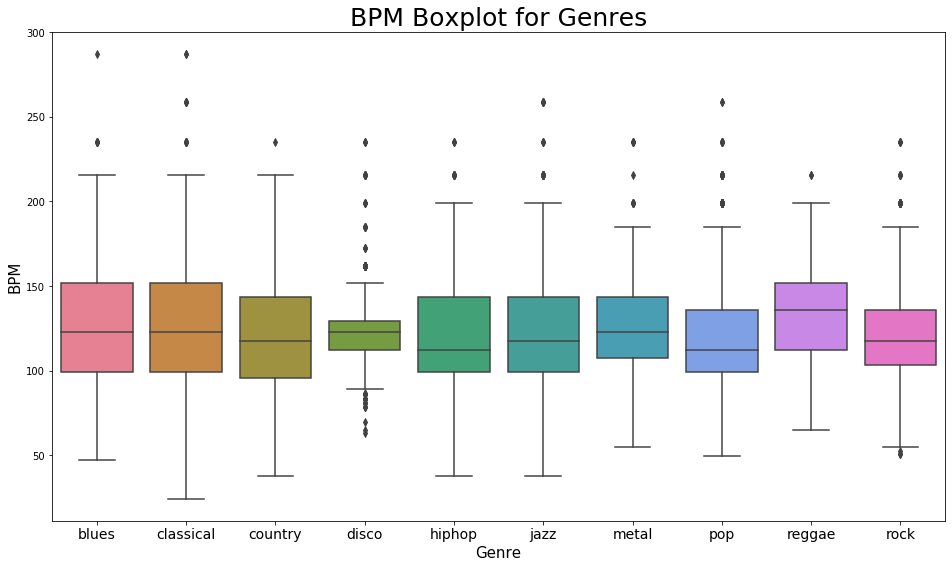

In [70]:
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [71]:
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

In [72]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [73]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [74]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [75]:
pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

In [76]:
data.shape

(9990, 59)

In [77]:
data.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [78]:
#df1 = df1.drop(labels='filename',axis=1)

In [79]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()

In [80]:
y = encoder.fit_transform(genre_list)

In [81]:
print(y)

[0 0 0 ... 9 9 9]


In [82]:
print(data.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [85]:
def create_model():
    model = Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [86]:
model = create_model()

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 56,906
Trainable params: 56,906
Non-trainable params: 0
_________________________________________________________________


In [88]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=64)

Epoch 1/500
94/94 [==============================] - 1s 2ms/step - loss: 1.3061 - accuracy: 0.5472
Epoch 2/500
94/94 [==============================] - 0s 2ms/step - loss: 0.7852 - accuracy: 0.7349
Epoch 3/500
94/94 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7951
Epoch 4/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.8325
Epoch 5/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8637
Epoch 6/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8912
Epoch 7/500
94/94 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9161
Epoch 8/500
94/94 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9391
Epoch 9/500
94/94 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9506
Epoch 10/500
94/94 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9580
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9990
Epoch 84/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 85/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9990
Epoch 86/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9992
Epoch 87/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9990
Epoch 88/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9845
Epoch 89/500
94/94 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9349
Epoch 90/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9850
Epoch 91/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9973
Epoch 92/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 93/500


94/94 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9992
Epoch 165/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9992
Epoch 166/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9988
Epoch 167/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9992
Epoch 168/500
94/94 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.9993
Epoch 169/500
94/94 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.9990
Epoch 170/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9988
Epoch 171/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9990
Epoch 172/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9993
Epoch 173/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9992
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9990
Epoch 246/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9992
Epoch 247/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9993
Epoch 248/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9990
Epoch 249/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9993
Epoch 250/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 251/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9988
Epoch 252/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9990
Epoch 253/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9993
Epoch 254/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9987
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9988
Epoch 327/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9990
Epoch 328/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9992
Epoch 329/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9992
Epoch 330/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9993
Epoch 331/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9992
Epoch 332/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9990
Epoch 333/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9990
Epoch 334/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9992
Epoch 335/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9988
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9988
Epoch 408/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9990
Epoch 409/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9992
Epoch 410/500
94/94 [==============================] - 0s 2ms/step - loss: 9.7235e-04 - accuracy: 0.9990
Epoch 411/500
94/94 [==============================] - 0s 2ms/step - loss: 9.8493e-04 - accuracy: 0.9988
Epoch 412/500
94/94 [==============================] - 0s 2ms/step - loss: 9.7345e-04 - accuracy: 0.9993
Epoch 413/500
94/94 [==============================] - 0s 2ms/step - loss: 9.9533e-04 - accuracy: 0.9990
Epoch 414/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9993
Epoch 415/500
94/94 [==============================] - 0s 2ms/step - loss: 9.9390e-04 - accuracy: 0.9990
Epoch 416/500
94/94 [==============================] - 0s 2ms/step - loss: 9.9898e-04

94/94 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9948
Epoch 488/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9987
Epoch 489/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9988
Epoch 490/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9992
Epoch 491/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9993
Epoch 492/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9990
Epoch 493/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9992
Epoch 494/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9990
Epoch 495/500
94/94 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.9992
Epoch 496/500
94/94 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9992
Epoc

In [89]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=64)

63/63 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.8866


In [90]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)

The test loss is : 1.0946736335754395 
The test accuracy is : 0.8866366147994995
